In [67]:
import pandas as pd 
import numpy as np 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [68]:
df = pd.read_csv('../DATA/all_season_summary.csv')

### EDA

In [69]:
df.head(10)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmedabad, Mar 31 2023",GT,CSK,GT,BOWL FIRST,178/7,182/5,182/5,178/7,GT,Titans won by 5 wkts (4b rem),2023-03-31T14:00Z,2023-04-01T23:59Z,57851,"Narendra Modi Stadium, Motera, Ahmedabad",Hardik Pandya,MS Dhoni,Rashid Khan,"Gujarat Titans 2, Chennai Super Kings 0",False,19.2,182.0,5.0,23.0,20.0,178.0,7.0,23.0,"Gill, Rashid lead defending champions Gujarat Titans to victory in IPL 2023 opener. Ruturaj Gaikwad scored 92 but Chennai Super Kings managed only 178 in Ahmedabad","Shubman Gill,Vijay Shankar","Rashid Khan,Mohammed Shami","Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Sudharsan (UKN),Hardik Pandya (AR),Vijay Shankar (AR),Rahul Tewatia (AR),Rashid Khan (AR),Mohammed Shami (BL),Josh Little (BL),Yash Dayal (BL),Alzarri Joseph (BL),Kane Williamson (UKN)","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen Ali (AR),Ben Stokes (AR),Ambati Rayudu (UKN),Shivam Dube (AR),Ravindra Jadeja (AR),MS Dhoni (WK),Mitchell Santner (AR),Deepak Chahar (BL),Rajvardhan Hangargekar (AR),Tushar Deshpande (BL)","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chandigarh, Apr 1 2023",PBKS,KKR,KKR,BOWL FIRST,191/5,146/7,191/5,146/7,PBKS,Punjab Kings won by 7 runs (DLS),2023-04-01T10:00Z,2023-04-02T23:59Z,57991,"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh",Shikhar Dhawan,Nitish Rana,Arshdeep Singh,"Punjab Kings 2, Kolkata Knight Riders 0",False,20.0,191.0,5.0,26.0,16.0,146.0,7.0,20.0,"Arshdeep, Rajapaksa lead Punjab Kings to victory in rain-hit game. Knight Riders, behind for most parts of the game, almost got to the DLS target thanks to Andre Russell and Venkatesh Iyer","Bhanuka Rajapaksa,Shikhar Dhawan","Arshdeep Singh,Rahul Chahar","Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),Bhanuka Rajapaksa (UKN),Jitesh Sharma (WK),Sikandar Raza (AR),Sam Curran (AR),M Shahrukh Khan (UKN),Harpreet Brar (BL),Rahul Chahar (BL),Arshdeep Singh (BL),Nathan Ellis (BL),Rishi Dhawan (AR)","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anukul Roy (AR),Venkatesh Iyer (AR),Nitish Rana (UKN),Rinku Singh (UKN),Andre Russell (AR),Shardul Thakur (BL),Sunil Narine (AR),Tim Southee (BL),Umesh Yadav (BL),Varun Chakravarthy (BL)","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Lucknow, Apr 1 2023",LSG,DC,DC,BOWL FIRST,193/6,143/9,193/6,143/9,LSG,Super Giants won by 50 runs,2023-04-01T14:00Z,2023-04-02T23:59Z,1070094,"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",KL Rahul,David Warner,Mark Wood,"Lucknow Super Giants 2, Delhi Capitals 0",False,20.0,193.0,6.0,21.0,20.0,143.0,9.0,17.0,"Wood five-for, Mayers 73 stud Super Giants' win. Capitals struggled against Super Giants' bowlers in the 194 chase on a challenging pitch","Kyle Mayers,Nicholas Pooran","Mark Wood,Avesh Khan","KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (AR),Krunal Pandya (AR),Marcus Stoinis (AR),Nicholas Pooran (WK),Ayush Badoni (UKN),Krishnappa Gowtham (AR),Avesh Khan (BL),Ravi Bishnoi (BL),Jaydev Unadkat (

In [70]:
df.columns


Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

* column names are already standardized.

In [71]:
# cols_of_interest = ['season', 'name', 'description', 'home_team', 'away_team',]

mdf = df.copy()


mdf['output'] = (mdf['home_team'] == mdf['winner']).astype(int)
mdf['run_rate'] = mdf['home_runs'] / mdf['home_overs']
mdf['bowl_econ'] = mdf['away_runs'] / mdf['away_overs']

mdf[['season_match', 'day_night_play']] = mdf.description.str.extract(r'^(.*?)\s*\(([^)]*)\)')
 

In [72]:
def h2h(df):
    df = df.sort_values('start_date')  # Ensure time order

    df = df.sort_values(by=['short_name', 'start_date'])

    df['shifted_home_win'] = df.groupby('short_name')['output'].shift(1)

    df['h2h_home_win_ratio_last_10'] = (
        df.groupby('short_name')['shifted_home_win']
        .rolling(window=10, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )

    df['shifted_runs'] = df.groupby('short_name')['home_runs'].shift(1) 

    df['h2h_avg_runs_last_10'] = (
        df.groupby('short_name')['shifted_runs']
        .rolling(window=10, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )
    return df 

In [73]:
mdf = h2h(mdf)
mdf[mdf.home_team == 'RCB'].head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,output,run_rate,bowl_econ,season_match,day_night_play,shifted_home_win,h2h_home_win_ratio_last_10,shifted_runs,h2h_avg_runs_last_10
987,2008.0,335996,Royal Challengers Bangalore v Chennai Super Kings,RCB v CSK,"15th match (N), Indian Premier League at Bengaluru, Apr 28 2008",RCB,CSK,CSK,BAT FIRST,178/5,165,165,178/5,CSK,Super Kings won by 13 runs,2008-04-28T14:30Z,2008-04-30T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,MS Dhoni,MS Dhoni,"Chennai Super Kings 2, Royal Challengers Bangalore 0",False,19.4,165.0,10.0,19.0,20.0,178.0,5.0,25.0,"Dhoni scripts narrow Chennai win. The Chennai Super Kings overcame two adverse situations, the first with the bat and then with the ball, to extend their unbeaten streak in the IPL to four matches","Ross Taylor,Wasim Jaffer","Zaheer Khan,Praveen Kumar","Bharat Chipli (BT),Wasim Jaffer (BT),Ross Taylor (BT),Jacques Kallis (AR),Mark Boucher (WK),Virat Kohli (BT),Rahul Dravid (BT),Praveen Kumar (BL),Zaheer Khan (BL),Balachandra Akhil (BL),Dale Steyn (BL)","Parthiv Patel (BT),Matthew Hayden (BT),Michael Hussey (BT),Suresh Raina (BT),MS Dhoni (WK),Jacob Oram (AR),S Badrinath (BT),Albie Morkel (AR),Joginder Sharma (AR),Palani Amarnath (UKN),Manpreet Gony (BL)","MS Dhoni,Michael Hussey","Manpreet Gony,Joginder Sharma",28 April 2008 - night match (20-over match),Russell Tiffin,Billy Doctrove,Krishna Hariharan,Javagal Srinath,NaN,0,8.505155,8.900000,15th match,N,NaN,NaN,NaN,NaN
918,2009.0,392185,Royal Challengers Bangalore v Chennai Super Kings,RCB v CSK,"5th match (D/N), Indian Premier League at Port Elizabeth, Apr 20 2009",RCB,CSK,CSK,BAT FIRST,179/5,87,87,179/5,CSK,Super Kings won by 92 runs,2009-04-20T14:30Z,2009-04-22T23:59Z,59159,"St George's Park, Port Elizabeth",Kevin Pietersen,MS Dhoni,Muttiah Muralitharan,"Chennai Super Kings 2, Royal Challengers Bangalore 0",False,15.2,87.0,10.0,10.0,20.0,179.0,5.0,21.0,NaN,"Jacques Kallis,Robin Uthappa","Praveen Kumar,Kevin Pietersen","Praveen Kumar (BL),Robin Uthappa (WK),Jacques Kallis (AR),Ross Taylor (BT),Kevin Pietersen (BT),Rahul Dravid (BT),Virat Kohli (BT),Rajesh Bishnoi (UKN),Vinay Kumar (BL),Dale Steyn (BL),Anil Kumble (UKN)","Parthiv Patel (BT),Matthew Hayden (BT),Suresh Raina (BT),MS Dhoni (WK),Andrew Flintoff (AR),Albie Morkel (AR),S Badrinath (BT),Joginder Sharma (AR),Lakshmipathy Balaji (BL),Manpreet Gony (BL),Muttiah Muralitharan (BL)","Matthew Hayden,Parthiv Patel","Muttiah Muralitharan,Lakshmipathy Balaji",20 April 2009 - day/night match (20-over match),Simon Taufel,Brian Jerling,Russell Tiffin,Gundappa Viswanath,Shaun George,0,5.723684,8.950000,5th match,D/N,0.0,0.000000,165.0,165.00
957,2009.0,392224,Royal Challengers Bangalore v Chennai Super Kings,RCB v CSK,"44th match, Indian Premier League at Durban, May 14 2009",RCB,CSK,CSK,BAT FIRST,129,132/8,132/8,129,RCB,RCB won by 2 wickets (with 2 balls remaining),2009-05-14T10:30Z,2009-05-16T23:59Z,59089,"Kingsmead, Durban",Anil Kumble,MS Dhoni,Ross Taylor,"Royal Challengers Bangalore 2, Chennai Super Kings 0",False,19.4,132.0,8.0,15.0,19.4,129.0,10.0,15.0,NaN,"Ross Taylor,Virat Kohli","Anil Kumble,Jacques Kallis","Robin Uthappa (BT),Jacques Kallis (AR),Rahul Dravid (BT),Ross Taylor (BT),Virat Kohli (BT),Mark Boucher (WK),Roelof van der Merwe (AR),Balachandra Akhil (BL),Praveen Kumar (BL),Vinay Kumar (BL),Anil Kumble (UKN)","Murali Vijay (BT),Matthew Hayden (BT),Suresh Raina (BT),MS Dhoni (WK),Jacob Oram (AR),S Badrinath (BT),Albie Morkel (AR),Shadab Jakati (BL),Lakshmipathy Balaji (BL),Mutt

In [74]:
def gen_ELO(df):
    df = df.sort_values('start_date')  # Ensure time order

    # Dictionary storing current Elo ratings for each team
    current_ratings = {}

    def get_rating(team):
        # Default to 1500 if the team isn't in our dict yet
        return current_ratings.get(team, 1500)

    K = 20
    updated_rows = []
    for idx, row in df.iterrows():
        teamA = row['home_team']
        teamB = row['away_team']
        S_A = row['output']  # 1 if A wins, 0 if B wins, 0.5 tie

        R_A = get_rating(teamA)
        R_B = get_rating(teamB)

        # Expected score for Team A
        E_A = 1 / (1 + 10 ** ((R_B - R_A) / 400))

        # Update both teams
        R_A_new = R_A + K * (S_A - E_A)
        R_B_new = R_B + K * ((1 - S_A) - (1 - E_A))

        # Store the new ratings
        current_ratings[teamA] = R_A_new
        current_ratings[teamB] = R_B_new

        # Optionally add to the row’s data
        row['elo_home_before'] = R_A
        row['elo_away_before'] = R_B
        row['elo_home_after'] = R_A_new
        row['elo_away_after'] = R_B_new
        row['elo_before'] = R_A - R_B
        updated_rows.append(row)

    # Create a new DataFrame with updated rating info
    df_updated = pd.DataFrame(updated_rows)
    return df_updated


In [75]:
mdf = gen_ELO(mdf)
# mdf[mdf.home_team == 'RCB']

In [76]:
def shift_and_roll_mean(df, group_col, value_col, new_col_name,
                        window=5, min_periods=1, fillna_val=0):
    """
    For the given 'value_col', do:
      1) Shift by 1 within each group.
      2) Rolling mean with the specified window.
      3) Create a new column with the result.
    """

    shifted = df.groupby(group_col)[value_col].shift(1)

    rolled = (
        shifted.groupby(df[group_col])
               .rolling(window=window, min_periods=min_periods)
               .mean()
    )
    df[new_col_name] = rolled.reset_index(level=0, drop=True)

    # Fill NaN for first matches
    df[new_col_name] = df[new_col_name].fillna(fillna_val)

    return df


In [77]:
def generate_new(my_df, team):
    my_df = my_df.sort_values(by=[
        team,
        'start_date'
    ])
    my_df = shift_and_roll_mean(my_df, team, 'home_runs', f'{team}_avg_runs_scored_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'away_runs', f'{team}_avg_runs_conceded_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'output', f'{team}_win_ratio_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'run_rate', f'{team}_avg_run_rate_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'bowl_econ', f'{team}_avg_bowl_econ_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'home_boundaries', f'{team}_avg_boundaries_scored_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'away_boundaries', f'{team}_avg_boundaries_conceded_last_5')
    return my_df

In [78]:
# Now shift+roll multiple columns
inter_df = generate_new(mdf, 'home_team')
# inter_df[inter_df.home_team == 'RCB']


In [79]:
proc_df = generate_new(inter_df, 'away_team')
# proc_df[proc_df.away_team == 'RCB']


#### cleanup columns 

In [80]:
cols_to_remove = ['result', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'home_runs', 'away_runs', 'home_wickets', 'away_wickets',
                  'pom', 'points', 'highlights', 'shifted_home_win', 'shifted_runs']

In [81]:
proc_df.drop(columns=cols_to_remove, axis=1, inplace=True)

In [82]:


# Secondary column removal
sec_cols_to_remove = ['id', 'description', 'name', 'venue_name', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']


In [83]:
proc_df.drop(columns=sec_cols_to_remove, axis=1, inplace=True)

In [84]:
# gen_df

In [85]:
proc_df.columns

Index(['season', 'short_name', 'home_team', 'away_team', 'toss_won',
       'decision', 'winner', 'start_date', 'end_date', 'venue_id',
       'home_captain', 'away_captain', 'super_over', 'home_overs',
       'home_boundaries', 'away_overs', 'away_boundaries', 'home_key_batsman',
       'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman',
       'away_key_bowler', 'output', 'run_rate', 'bowl_econ', 'season_match',
       'day_night_play', 'h2h_home_win_ratio_last_10', 'h2h_avg_runs_last_10',
       'elo_home_before', 'elo_away_before', 'elo_home_after',
       'elo_away_after', 'elo_before', 'home_team_avg_runs_scored_last_5',
       'home_team_avg_runs_conceded_last_5', 'home_team_win_ratio_last_5',
       'home_team_avg_run_rate_last_5', 'home_team_avg_bowl_econ_last_5',
       'home_team_avg_boundaries_scored_last_5',
       'home_team_avg_boundaries_conceded_last_5',
       'away_team_avg_runs_scored_last_5',
       'away_team_avg_runs_conceded_last_5', 'away_team_

In [86]:
# data leakage candidates 
ter_cols_to_remove = ['winner', 'super_over', 'home_overs', 'away_overs', 'home_boundaries', 'away_boundaries', 'elo_home_after', 'elo_away_after', 'elo_home_before', 'elo_away_before', 'run_rate', 'bowl_econ']
proc_df.drop(columns=ter_cols_to_remove, axis=1, inplace=True)

In [87]:
# other NLP fields (to be removed unless advanced analytics needed)
cat_cols_to_remove = ['short_name', 'start_date', 'end_date', 'home_captain', 'away_captain', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler']
proc_df.drop(columns=cat_cols_to_remove, axis=1, inplace=True)

In [88]:
# proc_df

In [89]:
# proc_df[(proc_df.home_team == 'RCB') | (proc_df.away_team == 'RCB')]


In [90]:
# proc_df[proc_df.away_team_avg_runs_scored_last_5 == 0.0]

In [91]:
proc_df.head()

,season,home_team,away_team,toss_won,decision,venue_id,output,season_match,day_night_play,h2h_home_win_ratio_last_10,h2h_avg_runs_last_10,elo_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,2nd match,D/N,NaN,NaN,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,15th match,N,NaN,NaN,-38.873861,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,RR,CSK,CSK,BAT FIRST,58162,1,24th match,N,NaN,NaN,0.863448,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,DC,CSK,CSK,BOWL FIRST,58040,0,28th match,D/N,NaN,NaN,10.633111,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,MI,CSK,MI,BOWL FIRST,58324,1,36th match,N,NaN,NaN,-31.885898,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [92]:
proc_df.decision.value_counts()

decision
BOWL FIRST    650
BAT FIRST     372
no toss         7
Name: count, dtype: int64

In [93]:
import matplotlib.pyplot as plt

In [94]:

for team in proc_df.home_team.unique():
    print(f'{team} ELO: {proc_df[proc_df.home_team == team].elo_before.mean()}')


KXIP ELO: -24.788791472966157
RCB ELO: -21.580147716267938
RR ELO: -2.903116852894499
DC ELO: -40.36751905113323
MI ELO: 41.63284986000127
KKR ELO: 8.739091340916374
SRH ELO: -19.581267639961315
Kochi ELO: -0.050340894893062274
PWI ELO: -66.94604532068882
PBKS ELO: -20.284203216073557
LSG ELO: 6.596440079350728
GT ELO: 47.18265349603509
CSK ELO: 49.814856887387755
GL ELO: 6.415188038883798
RPS ELO: -31.12731287246587


In [95]:
mean_elos = proc_df.groupby('home_team')['elo_before'].mean().sort_values().reset_index()
mean_elos

,home_team,elo_before
0,PWI,-66.946045
1,DC,-40.367519
2,RPS,-31.127313
3,KXIP,-24.788791
4,RCB,-21.580148
5,PBKS,-20.284203
6,SRH,-19.581268
7,RR,-2.903117
8,Kochi,-0.050341
9,GL,6.415188


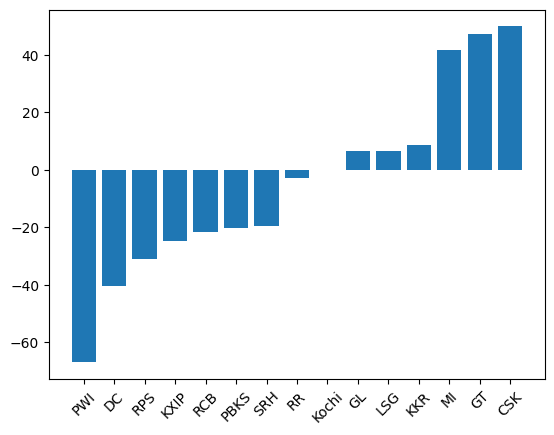

In [96]:
plt.bar(mean_elos.home_team, mean_elos.elo_before)
# plt.ylim(1200, 1800)
plt.xticks(rotation=45)
plt.show()

In [97]:
proc_df.head()

,season,home_team,away_team,toss_won,decision,venue_id,output,season_match,day_night_play,h2h_home_win_ratio_last_10,h2h_avg_runs_last_10,elo_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,2nd match,D/N,NaN,NaN,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,15th match,N,NaN,NaN,-38.873861,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,RR,CSK,CSK,BAT FIRST,58162,1,24th match,N,NaN,NaN,0.863448,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,DC,CSK,CSK,BOWL FIRST,58040,0,28th match,D/N,NaN,NaN,10.633111,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,MI,CSK,MI,BOWL FIRST,58324,1,36th match,N,NaN,NaN,-31.885898,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [98]:
proc_df.season.unique()

array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2018.,
       2019., 2020., 2021., 2022., 2023.,   nan, 2016., 2017.])

### Handle N/A s

In [99]:

proc_df.isna().sum()

season                                        3
home_team                                     0
away_team                                     0
toss_won                                      3
decision                                      3
venue_id                                      0
output                                        0
season_match                                 37
day_night_play                               37
h2h_home_win_ratio_last_10                  159
h2h_avg_runs_last_10                        159
elo_before                                    0
home_team_avg_runs_scored_last_5              0
home_team_avg_runs_conceded_last_5            0
home_team_win_ratio_last_5                    0
home_team_avg_run_rate_last_5                 0
home_team_avg_bowl_econ_last_5                0
home_team_avg_boundaries_scored_last_5        0
home_team_avg_boundaries_conceded_last_5      0
away_team_avg_runs_scored_last_5              0
away_team_avg_runs_conceded_last_5      

In [100]:

season_min = proc_df.season.min()
proc_df['season'] = proc_df.season.fillna(season_min)

In [101]:
proc_df['toss_won'] = proc_df.toss_won.fillna('')
proc_df['decision'] = proc_df.decision.fillna('')
proc_df['day_night_play'] = proc_df.day_night_play.fillna('')
proc_df['season_match'] = proc_df.season_match.fillna('')

In [102]:
for c in ['h2h_home_win_ratio_last_10', 'h2h_avg_runs_last_10']:
    mean_c = proc_df[c].mean()
    proc_df[c] = proc_df[c].fillna(mean_c)

In [103]:
proc_df.isna().sum()

season                                      0
home_team                                   0
away_team                                   0
toss_won                                    0
decision                                    0
venue_id                                    0
output                                      0
season_match                                0
day_night_play                              0
h2h_home_win_ratio_last_10                  0
h2h_avg_runs_last_10                        0
elo_before                                  0
home_team_avg_runs_scored_last_5            0
home_team_avg_runs_conceded_last_5          0
home_team_win_ratio_last_5                  0
home_team_avg_run_rate_last_5               0
home_team_avg_bowl_econ_last_5              0
home_team_avg_boundaries_scored_last_5      0
home_team_avg_boundaries_conceded_last_5    0
away_team_avg_runs_scored_last_5            0
away_team_avg_runs_conceded_last_5          0
away_team_win_ratio_last_5        

In [145]:
cat_cols = [col  for col in proc_df.columns if proc_df[col].dtype == object]
num_cols = list(set(proc_df.columns) - set(cat_cols))
for col in cat_cols:
    proc_df[col] = (
        proc_df[col]
        .str.lower()
        .str.strip()
        .str.replace(r'\s+', '_', regex=True)
    )

### Split / Shuffle Data for validation and testing. 

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
# Since it needs to be a time aware split, shuffle=False .. which results in past matches only for training and future matches for predicting.
df_full_train, df_test = train_test_split(proc_df, test_size=.2, shuffle=False, random_state=21)
df_train, df_val = train_test_split(df_full_train, test_size=20/80, shuffle=False, random_state=21)
len(df_train),  len(df_val), len(df_test)

(618, 207, 207)

In [107]:
df_train.head()

,season,home_team,away_team,toss_won,decision,venue_id,output,season_match,day_night_play,h2h_home_win_ratio_last_10,h2h_avg_runs_last_10,elo_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,kxip,csk,csk,bat_first,57991,0,2nd_match,d/n,0.536102,154.45671,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,rcb,csk,csk,bat_first,57897,0,15th_match,n,0.536102,154.45671,-38.873861,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,rr,csk,csk,bat_first,58162,1,24th_match,n,0.536102,154.45671,0.863448,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,dc,csk,csk,bowl_first,58040,0,28th_match,d/n,0.536102,154.45671,10.633111,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,mi,csk,mi,bowl_first,58324,1,36th_match,n,0.536102,154.45671,-31.885898,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [108]:
y_train = df_train.pop('output')
y_val = df_val.pop('output')
y_test = df_test.pop('output')
y_train.head()

974     0
987     0
996     1
1000    0
1008    1
Name: output, dtype: int64

In [109]:
df_full_train.dtypes
num_cols = list(set(df_train.columns) - set(cat_cols))


In [110]:
num_cols

['away_team_win_ratio_last_5',
 'home_team_avg_runs_scored_last_5',
 'home_team_avg_run_rate_last_5',
 'season',
 'away_team_avg_boundaries_scored_last_5',
 'home_team_avg_boundaries_scored_last_5',
 'home_team_avg_bowl_econ_last_5',
 'h2h_home_win_ratio_last_10',
 'away_team_avg_run_rate_last_5',
 'home_team_avg_runs_conceded_last_5',
 'home_team_win_ratio_last_5',
 'home_team_avg_boundaries_conceded_last_5',
 'elo_before',
 'venue_id',
 'away_team_avg_bowl_econ_last_5',
 'away_team_avg_boundaries_conceded_last_5',
 'away_team_avg_runs_conceded_last_5',
 'away_team_avg_runs_scored_last_5',
 'h2h_avg_runs_last_10']

In [111]:
cat_cols

['home_team',
 'away_team',
 'toss_won',
 'decision',
 'season_match',
 'day_night_play']

In [112]:
df_full_train.home_team.value_counts()

home_team
srh      110
dc        98
rcb       97
csk       96
mi        92
kkr       86
rr        84
kxip      73
pwi       18
pbks      15
lsg       14
gt        13
gl        12
rps       12
kochi      5
Name: count, dtype: int64

In [113]:
df_full_train.decision.value_counts()

decision
bowl_first    530
bat_first     289
                3
no_toss         3
Name: count, dtype: int64

In [114]:
# Home team win rate

home_team_win_rate = df_full_train.output.mean()
home_team_win_rate

0.5163636363636364

In [115]:
# Home team win rate w.r.t toss decision
bowl_first_wins = df_full_train[df_full_train.decision == 'BOWL FIRST'].output.mean()
bat_first_wins = df_full_train[df_full_train.decision == 'BAT FIRST'].output.mean()

bowl_first_wins, bat_first_wins

(nan, nan)

In [116]:
# Home team win rate w.r.t toss wins  
df_full_train[df_full_train.toss_won == df_full_train.home_team].output.mean()

0.5358024691358024

In [117]:
# Home team win rate w.r.t toss decision  
bowl_first_wins = df_full_train[df_full_train.decision == 'BOWL FIRST'].output.mean()
bat_first_wins = df_full_train[df_full_train.decision == 'BAT FIRST'].output.mean()

bowl_first_wins, bat_first_wins

(nan, nan)

In [118]:
from IPython.display import display

for c in cat_cols:
    print(c)
    df_group = df_full_train.groupby(c).output.agg(['mean', 'count'])
    df_group['diff'] = home_team_win_rate - df_group['mean']
    df_group['risk'] = df_group['mean'] / home_team_win_rate
    display(df_group)
    print()
    print()

home_team


,mean,count,diff,risk
home_team,,,,
csk,0.625000,96,-0.108636,1.210387
dc,0.489796,98,0.026568,0.948548
gl,0.416667,12,0.099697,0.806925
gt,0.615385,13,-0.099021,1.191766
kkr,0.488372,86,0.027992,0.945791
kochi,0.400000,5,0.116364,0.774648
kxip,0.506849,73,0.009514,0.981574
lsg,0.428571,14,0.087792,0.829980
mi,0.576087,92,-0.059723,1.115661




away_team


,mean,count,diff,risk
away_team,,,,
csk,0.470588,102,0.045775,0.911350
dc,0.608696,115,-0.092332,1.178812
gl,0.466667,15,0.049697,0.903756
gt,0.266667,15,0.249697,0.516432
kkr,0.528000,125,-0.011636,1.022535
kochi,0.571429,7,-0.055065,1.106640
kxip,0.577320,97,-0.060956,1.118048
lsg,0.285714,14,0.230649,0.553320
mi,0.449612,129,0.066751,0.870728




toss_won


,mean,count,diff,risk
toss_won,,,,
,0.333333,3,0.183030,0.645540
csk,0.542857,105,-0.026494,1.051308
dc,0.557522,113,-0.041158,1.079708
gl,0.266667,15,0.249697,0.516432
gt,0.352941,17,0.163422,0.683513
kkr,0.514019,107,0.002345,0.995459
kochi,0.500000,6,0.016364,0.968310
kxip,0.552941,85,-0.036578,1.070837
lsg,0.500000,10,0.016364,0.968310




decision


,mean,count,diff,risk
decision,,,,
,0.333333,3,0.183030,0.645540
bat_first,0.543253,289,-0.026889,1.052074
bowl_first,0.505660,530,0.010703,0.979272
no_toss,0.000000,3,0.516364,0.000000




season_match


,mean,count,diff,risk
season_match,,,,
,0.515152,33,0.001212,0.997653
10th_match,0.692308,13,-0.175944,1.340737
11th_match,0.538462,13,-0.022098,1.042795
12th_match,0.363636,11,0.152727,0.704225
"12th_match,_pepsi_indian_premier_league_at_dubai",1.000000,1,-0.483636,1.936620
...,...,...,...,...
elimination_final,1.000000,2,-0.483636,1.936620
eliminator,0.000000,6,0.516364,0.000000
final,0.384615,13,0.131748,0.744854




day_night_play


,mean,count,diff,risk
day_night_play,,,,
,0.515152,33,0.001212,0.997653
d/n,0.580189,212,-0.063825,1.123605
dsc,0.400000,5,0.116364,0.774648
n,0.493913,575,0.022451,0.956522


In [119]:
from sklearn.metrics import mutual_info_score

In [120]:
mutual_info_score(df_full_train.toss_won, df_full_train.output)

0.011412760216100284

In [121]:
def mi_score_against_churn(series_col):
    return mutual_info_score(series_col, df_full_train.output)

In [122]:
mi_scores = df_full_train[cat_cols].apply(mi_score_against_churn)
mi_scores

home_team         0.010461
away_team         0.012788
toss_won          0.011413
decision          0.003544
season_match      0.070667
day_night_play    0.002975
dtype: float64

### Correlation coefficient for numeric columns

In [123]:
corr_scores = df_full_train[num_cols].corrwith(df_full_train.output)
corr_scores.sort_values()

venue_id                                   -0.084251
season                                     -0.041367
away_team_avg_boundaries_conceded_last_5   -0.032768
home_team_avg_boundaries_conceded_last_5   -0.029273
away_team_avg_runs_conceded_last_5         -0.024797
home_team_avg_bowl_econ_last_5             -0.022727
away_team_avg_boundaries_scored_last_5     -0.022388
away_team_avg_run_rate_last_5              -0.017706
home_team_avg_runs_conceded_last_5         -0.017391
away_team_win_ratio_last_5                 -0.013334
away_team_avg_bowl_econ_last_5             -0.005234
home_team_avg_run_rate_last_5              -0.004885
away_team_avg_runs_scored_last_5           -0.003948
home_team_avg_boundaries_scored_last_5      0.012656
h2h_home_win_ratio_last_10                  0.015984
home_team_avg_runs_scored_last_5            0.018537
home_team_win_ratio_last_5                  0.024152
h2h_avg_runs_last_10                        0.045376
elo_before                                  0.

In [124]:
##  Train Logistic Regression 

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [126]:
# train_dicts = df_train.to_dict(orient='records')
# val_dicts = df_val.to_dict(orient='records')

# dv = DictVectorizer(sparse=False)

# X_train = dv.fit_transform(train_dicts)
# X_val = dv.transform(val_dicts)

# X_train.shape, X_val.shape

In [127]:
cat_cols

['home_team',
 'away_team',
 'toss_won',
 'decision',
 'season_match',
 'day_night_play']

In [128]:
num_cols

['away_team_win_ratio_last_5',
 'home_team_avg_runs_scored_last_5',
 'home_team_avg_run_rate_last_5',
 'season',
 'away_team_avg_boundaries_scored_last_5',
 'home_team_avg_boundaries_scored_last_5',
 'home_team_avg_bowl_econ_last_5',
 'h2h_home_win_ratio_last_10',
 'away_team_avg_run_rate_last_5',
 'home_team_avg_runs_conceded_last_5',
 'home_team_win_ratio_last_5',
 'home_team_avg_boundaries_conceded_last_5',
 'elo_before',
 'venue_id',
 'away_team_avg_bowl_econ_last_5',
 'away_team_avg_boundaries_conceded_last_5',
 'away_team_avg_runs_conceded_last_5',
 'away_team_avg_runs_scored_last_5',
 'h2h_avg_runs_last_10']

In [129]:
# List of features for processing
categorical_features_small = ["day_night_play", "decision"]
high_cardinality_features = [
    'home_team',
    'away_team',
    'toss_won',
    'season_match'
 ]


# Target Encoding for High Cardinality Features
target_enc = ce.TargetEncoder(cols=high_cardinality_features)
df_train_encoded = target_enc.fit_transform(df_train, y_train)
df_val_encoded = target_enc.transform(df_val)

df_train = df_train_encoded.reset_index(drop=True)
df_val = df_val_encoded.reset_index(drop=True)

In [130]:
# Create Pipelines for Numerical and Categorical Features

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),    # Fill missing values with mean
    ('scaler', StandardScaler())                    # Standardize numerical values
])

# Categorical Transformer for One-Hot Encoding (for low cardinality categorical features)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer to apply transformations to different features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, categorical_features_small)
    ],
    remainder='drop'  # Drop any columns not specified
)

In [131]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=21, max_iter=1000))
])

model.fit(df_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['away_team_win_ratio_last_5',
                                                   'home_team_avg_runs_scored_last_5',
                                                   'home_team_avg_run_rate_last_5',
                                                   'season',
                                                   'away_team_avg_boundaries_scored_last_5',
                                                   'home_team_avg_boundaries_scored_last_5',
                                                   'home_team_avg_bo...
                                                   'elo_before', 'venue_id',
                                                   'away_team_avg_bowl_econ_last_5',
                                                   'away_team_avg_boundaries_conceded_last_5',
                                                   'away_team_avg_runs_conceded_last_5',
                                                   'away_team_avg_runs_scored_last_5',
                                                   'h2h_avg_runs_last_10']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['day_night_play',
                                                   'decision'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=21))])

In [132]:
df_train.head()

,season,home_team,away_team,toss_won,decision,venue_id,season_match,day_night_play,h2h_home_win_ratio_last_10,h2h_avg_runs_last_10,elo_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
0,2008.0,0.463488,0.470599,0.516126,bat_first,57991,0.547469,d/n,0.536102,154.45671,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2008.0,0.488403,0.470599,0.516126,bat_first,57897,0.494914,n,0.536102,154.45671,-38.873861,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
2,2008.0,0.623621,0.470599,0.516126,bat_first,58162,0.535175,n,0.536102,154.45671,0.863448,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
3,2008.0,0.507277,0.470599,0.516126,bowl_first,58040,0.535175,d/n,0.536102,154.45671,10.633111,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
4,2008.0,0.601945,0.470599,0.521271,bowl_first,58324,0.547469,n,0.536102,154.45671,-31.885898,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [133]:
for c in [0.1, 0.25, 0.4, 0.5, 0.75, 1, 2]:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=21, C=c, max_iter=1000))
    ])  

    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)
    print(f"C={c} Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")


    

C=0.1 Accuracy: 0.5942028985507246 , ROC: 0.5822399250234301 
C=0.25 Accuracy: 0.6183574879227053 , ROC: 0.6074039362699156 
C=0.4 Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 
C=0.5 Accuracy: 0.6328502415458938 , ROC: 0.6216494845360825 
C=0.75 Accuracy: 0.6280193236714976 , ROC: 0.6164948453608248 
C=1 Accuracy: 0.6328502415458938 , ROC: 0.6216494845360825 
C=2 Accuracy: 0.6376811594202898 , ROC: 0.6274133083411434 


In [134]:
for i in [10, 100, 1000, 5000, 10000, 20000]:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=21, C=0.4, max_iter=i))
    ])  

    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)
    print(f"max iter={i} Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")

max iter=10 Accuracy: 0.6135265700483091 , ROC: 0.6034676663542643 
max iter=100 Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 
max iter=1000 Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 
max iter=5000 Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 
max iter=10000 Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 
max iter=20000 Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 


/Users/anup.sethuram/.local/share/virtualenvs/ipl_note-CxxBWMJC/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=21, C=0.4, max_iter=1000, solver='liblinear', penalty='l1'))
])  

model.fit(df_train, y_train)
y_pred = model.predict(df_val)
print(f"C={0.4} and L1 penalty with liblinear, Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")

C=0.4 and L1 penalty with liblinear, Accuracy: 0.5748792270531401 , ROC: 0.5616213683223992 


In [136]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=21, C=0.4, max_iter=1000, penalty='l2'))
])  

model.fit(df_train, y_train)
y_pred = model.predict(df_val)
print(f"C={0.4} and L2 penalty, Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")

C=0.4 and L2 penalty, Accuracy: 0.6280193236714976 , ROC: 0.6171040299906279 


In [137]:
## Cross validation
y_full_train = df_full_train.pop('output')
    

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):

    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = y_full_train.iloc[train_idx].values
    y_val = y_full_train.iloc[val_idx].values

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=21, C=0.4, max_iter=1000, penalty='l2'))
    ])  

    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)
    print(f"C={0.4} and L2 penalty, Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

C=0.4 and L2 penalty, Accuracy: 0.5060240963855421 , ROC: 0.49766899766899764 


4it [00:00, 36.85it/s]

C=0.4 and L2 penalty, Accuracy: 0.39759036144578314 , ROC: 0.3989547038327526 
C=0.4 and L2 penalty, Accuracy: 0.6265060240963856 , ROC: 0.6289198606271776 
C=0.4 and L2 penalty, Accuracy: 0.5180722891566265 , ROC: 0.5174418604651163 
C=0.4 and L2 penalty, Accuracy: 0.46987951807228917 , ROC: 0.47943595769682723 
C=0.4 and L2 penalty, Accuracy: 0.4146341463414634 , ROC: 0.41485507246376807 


8it [00:00, 37.98it/s]

C=0.4 and L2 penalty, Accuracy: 0.5975609756097561 , ROC: 0.591025641025641 
C=0.4 and L2 penalty, Accuracy: 0.524390243902439 , ROC: 0.5377241805813234 
C=0.4 and L2 penalty, Accuracy: 0.47560975609756095 , ROC: 0.4722222222222222 


10it [00:00, 37.93it/s]

C=0.4 and L2 penalty, Accuracy: 0.47560975609756095 , ROC: 0.47376267143709005 


In [138]:
# Cross val doesn't make too much sense in a time ordered pred model.. 

In [139]:
df_train.head()

,season,home_team,away_team,toss_won,decision,venue_id,season_match,day_night_play,h2h_home_win_ratio_last_10,h2h_avg_runs_last_10,elo_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,kxip,csk,csk,bat_first,57991,2nd_match,d/n,0.536102,154.45671,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,rcb,csk,csk,bat_first,57897,15th_match,n,0.536102,154.45671,-38.873861,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,rr,csk,csk,bat_first,58162,24th_match,n,0.536102,154.45671,0.863448,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,dc,csk,csk,bowl_first,58040,28th_match,d/n,0.536102,154.45671,10.633111,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,mi,csk,mi,bowl_first,58324,36th_match,n,0.536102,154.45671,-31.885898,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [140]:
## Random forest

from sklearn.ensemble import RandomForestClassifier



In [141]:
for n in [25, 50, 100, 200, 500, 1000]:
    rf_model = RandomForestClassifier(
        n_estimators=n, max_depth=10, random_state=21
    )

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', rf_model)
    ])  

    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)
    print(f" {n} :> Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")

 25 :> Accuracy: 0.524390243902439 , ROC: 0.5190816935002982 
 50 :> Accuracy: 0.5487804878048781 , ROC: 0.5447227191413238 
 100 :> Accuracy: 0.5121951219512195 , ROC: 0.5086463923673226 
 200 :> Accuracy: 0.5121951219512195 , ROC: 0.5050685748360167 
 500 :> Accuracy: 0.5 , ROC: 0.4922480620155039 
 1000 :> Accuracy: 0.4878048780487805 , ROC: 0.4806201550387597 


In [142]:
for d in [5, 8, 10, 12, 15, 20, 50]:
    rf_model = RandomForestClassifier(
        n_estimators=500, max_depth=d, random_state=21
    )

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', rf_model)
    ])  

    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)
    print(f" {d} :> Accuracy: {accuracy_score(y_val, y_pred)} , ROC: {roc_auc_score(y_val, y_pred)} ")

 5 :> Accuracy: 0.5 , ROC: 0.4910554561717352 
 8 :> Accuracy: 0.4634146341463415 , ROC: 0.4537865235539654 
 10 :> Accuracy: 0.5 , ROC: 0.4922480620155039 
 12 :> Accuracy: 0.5 , ROC: 0.4922480620155039 
 15 :> Accuracy: 0.5121951219512195 , ROC: 0.5062611806797853 
 20 :> Accuracy: 0.4878048780487805 , ROC: 0.4794275491949911 
 50 :> Accuracy: 0.4634146341463415 , ROC: 0.4537865235539654 


In [143]:
X_train_transformed = model.named_steps['preprocessor'].transform(df_train)
print(X_train_transformed.shape)


(743, 27)


In [144]:
cat_cols = model.named_steps['preprocessor'].named_transformers_['cat']\
               .named_steps['onehot'].get_feature_names_out()
num_cols = num_cols  # from your code
print("Categorical columns after one-hot:", cat_cols)


Categorical columns after one-hot: ['day_night_play_' 'day_night_play_d/n' 'day_night_play_dsc'
 'day_night_play_n' 'decision_' 'decision_bat_first' 'decision_bowl_first'
 'decision_no_toss']
